In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf
import numpy as np
from keras.utils.vis_utils import plot_model
from IPython.display import Image

2022-02-20 14:28:08.902412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-20 14:28:08.902446: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
perceptron = Sequential(name="Perzeptron")
perceptron.add(Dense(1))
perceptron.add(Dense(50))
perceptron.add(Dense(2, activation="softmax"))

2022-02-20 14:28:11.414333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-20 14:28:11.414402: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-20 14:28:11.414442: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (joris-laptop): /proc/driver/nvidia/version does not exist
2022-02-20 14:28:11.414873: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
perceptron.compile(optimizer='adam', loss="MeanSquaredError")

In [8]:
x_val = np.random.randint(0, 400, size=1000)
x_features = x_val
y = np.vstack([(x_val % 2 == 0).astype(float), (x_val % 2 != 0).astype(float)])
x_features = x_features.T
y = (y.T.reshape(1000, 2))
x = x_features.reshape(1000, 1)

In [9]:
perceptron.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4873
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4685
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4427
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3129
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3672
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4320
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3982
Epoch 13/100
32/32 [=================

In [10]:
perceptron.summary()

Model: "Perzeptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


In [11]:
augment = lambda x: np.array([x, x%2, 2*x, x/2, np.sqrt(x)], ndmin=2)
print(augment(2).reshape(5, 1))

[[2.        ]
 [0.        ]
 [4.        ]
 [1.        ]
 [1.41421356]]


In [13]:
perceptron(np.array([2]))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.5020147, 0.4979853]], dtype=float32)>

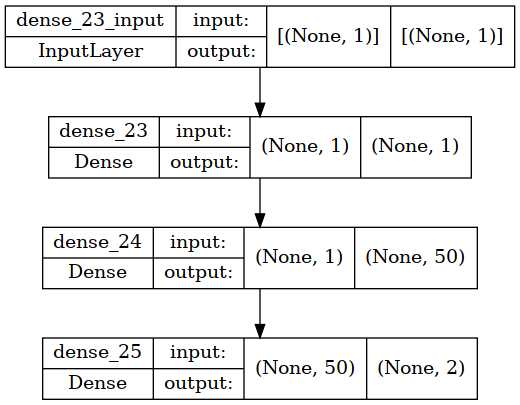

In [172]:
plot_model(perceptron, show_shapes=True)

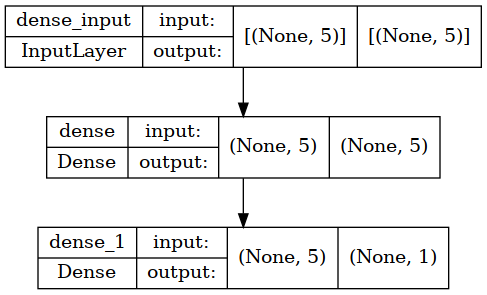